# Exploratory Data Analysis Googleplaystore

## Dataset Googleplaystore

Dataset Googleplaystore teridiri dari :
1. Googleplaystore Apps : googleplaystore
2. Googleplaystore user review : googleplaystore_user_review

Tipe kedua dataset tersebut adalah csv

## Importing library & Dataset

In [31]:
# Import library
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import pandas as pd

# Import data
dfGapps = pd.read_csv('dataset/googleplaystore.csv')
dfGUserReview = pd.read_csv('dataset/googleplaystore_user_reviews.csv')


## Googleplaystore Apps

Googleplaystore Apps adalah dataset mengenai aplikasi yang terdapat di googleplaystore dan terdiri dari :

In [2]:
# Baris beserta tipe data
dfGapps.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [3]:
# Jumlah baris dan kolom
dfGapps.shape

(10841, 13)

In [4]:
# Menampilkan dataset
dfGapps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


## Googleplaystore User Review

Googleplaystore Usert Review adalah dataset mengenaai review dari tiap user terhadap aplikasi dalam Googleplaystore dan terdiri dari :

In [5]:
# Baris dan tipe data
dfGUserReview.dtypes

App                        object
Translated_Review          object
Sentiment                  object
Sentiment_Polarity        float64
Sentiment_Subjectivity    float64
dtype: object

In [6]:
# Jumlah baris dan kolom
dfGUserReview.shape

(64295, 5)

In [7]:
# menampilkan dataset
dfGUserReview.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


## Menghitung Keseluruhan Review dari dfGUserReview

In [8]:
count = dfGUserReview['App'].value_counts() 
print(count) 

Angry Birds Classic                                   320
Bowmasters                                            320
CBS Sports App - Scores, News, Stats & Watch Live     320
8 Ball Pool                                           300
Helix Jump                                            300
Calorie Counter - MyFitnessPal                        260
Bubble Shooter                                        260
Duolingo: Learn Languages Free                        240
DEAD TARGET: FPS Zombie Apocalypse Survival Games     240
Candy Crush Saga                                      240
Garena Free Fire                                      240
ESPN                                                  240
Farm Heroes Saga                                      220
Hangouts                                              220
Google Photos                                         220
Granny                                                220
Block Puzzle                                          220
Hill Climb Rac

### Membersihkan data kosong dari dataset Googleplaystore User Review 

Googleplaystore User Review memiliki banyak data yang nilainya kosong atau NaN dan tidak memiliki arti untuk disimpan kedalam dataset,
Sehingga data tersebut harus dibuang untuk meringankan pengolahan data.

In [9]:
# membuat tampungan baru untuk diolah
dfNaN = dfGUserReview

# menampilkan jumlah baris sebelum didrop
print("\nJumlah baris sebelum mendrop baris Null : ", len(dfNaN)) 

# mendrop baris yang memiliki nilai NaN minimum 4 dari tampungan ke-2
dfNaNDrop = dfNaN.dropna(axis = 0, how ='all', thresh=4) 

# Menampilkan perbandingan dari tampungan ke-1 dan tampungan ke-2 setelah di drop
print("Panjang dataframe Sebelumnya:", len(dfNaN), "\nPanjang dataframe Setelah didrop:",  
       len(dfNaNDrop), "\nJumlah baris dengan Nilai NaN minimum 4 : ", 
       (len(dfNaN)-len(dfNaNDrop)))

# memasukan nilai dari data yang sudah dibersihkan dari nilai NaN ke dfGUserReview
dfGUserReview = dfNaNDrop

# Mereset Index dari dfGUserReview
dfGUserReview.set_index('App', inplace=True)
dfGUserReview.reset_index(inplace=True)


Jumlah baris sebelum mendrop baris Null :  64295
Panjang dataframe Sebelumnya: 64295 
Panjang dataframe Setelah didrop: 37432 
Jumlah baris dengan Nilai NaN minimum 4 :  26863


## Mencari value unik dari dataset Googleplaystore Apps

Dalam Dataset GooglePlaystore terdapat value-value unik yabg dapat ditamplikan untuk mendapat gambaran mengenai value yang ada dari tiap kolom.
Berikut ini adalah value unik dari tiap kolom :

### Category

In [10]:
# nilai unik dari kolom kategori
dfGapps['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

Dalam kolom kategori ditemukan value yang tidak sesuai dengan keseluruhan data yang ada yaitu '1.9', maka harus ditemukan baris keberapa yang memiliki nilai tersebut.

In [11]:
dfGapps[dfGapps['Category'] == '1.9']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


dalam baris tersebut terlihat ada pergeseran data sehingga baris dan kolom tidak sinkron satu dengan yang lain. untuk mengatasi hal tersebut digunakan shift method yang ada dalam pandas.

In [12]:
dfGapps.loc[10472] = dfGapps.loc[10472].shift()
dfGapps['App'].loc[10472] = dfGapps['Category'].loc[10472]
dfGapps['Category'].loc[10472] = np.nan
dfGapps.loc[10472]

App               Life Made WI-Fi Touchscreen Photo Frame
Category                                              NaN
Rating                                                1.9
Reviews                                                19
Size                                                 3.0M
Installs                                           1,000+
Type                                                 Free
Price                                                   0
Content Rating                                   Everyone
Genres                                                NaN
Last Updated                            February 11, 2018
Current Ver                                        1.0.19
Android Ver                                    4.0 and up
Name: 10472, dtype: object

In [13]:
# membuat list untuk menampung data Category yang unik
data_cat = {'Category':dfGapps['Category'].unique()} 

# memasukan data kategori ke dataframe
dfCat = pd.DataFrame(data_cat)
dfCat.head(10)

,Category
0,ART_AND_DESIGN
1,AUTO_AND_VEHICLES
2,BEAUTY
3,BOOKS_AND_REFERENCE
4,BUSINESS
5,COMICS
6,COMMUNICATION
7,DATING
8,EDUCATION
9,ENTERTAINMENT


Didalam Dataset Googleplaystore terdapat banyak aplikasi dengan berbagai category dan dengan mengitung jumlah apliasi dari tiap category dapat ditemukan category yang paling terkenal dalam Googleplaystore.

In [14]:
dfGapps.groupby('Category')['App'].count()

Category
ART_AND_DESIGN           65
AUTO_AND_VEHICLES        85
BEAUTY                   53
BOOKS_AND_REFERENCE     231
BUSINESS                460
COMICS                   60
COMMUNICATION           387
DATING                  234
EDUCATION               156
ENTERTAINMENT           149
EVENTS                   64
FAMILY                 1972
FINANCE                 366
FOOD_AND_DRINK          127
GAME                   1144
HEALTH_AND_FITNESS      341
HOUSE_AND_HOME           88
LIBRARIES_AND_DEMO       85
LIFESTYLE               382
MAPS_AND_NAVIGATION     137
MEDICAL                 463
NEWS_AND_MAGAZINES      283
PARENTING                60
PERSONALIZATION         392
PHOTOGRAPHY             335
PRODUCTIVITY            424
SHOPPING                260
SOCIAL                  295
SPORTS                  384
TOOLS                   843
TRAVEL_AND_LOCAL        258
VIDEO_PLAYERS           175
WEATHER                  82
Name: App, dtype: int64

Hasil data diatas dapat divisualisasikan kedalam bentuk barchart seperti ini.

Text(0.5, 1.0, 'Jumlah Aplikasi berdasarkan Category')

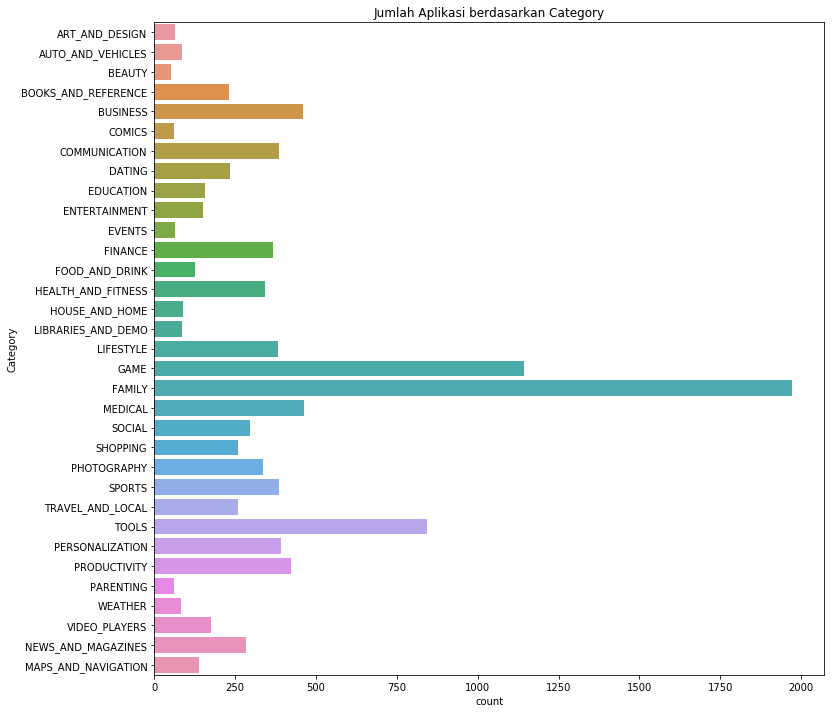

In [15]:
plt.figure(figsize=(12,12))
sns.countplot(y='Category',data = dfGapps)
plt.title("Jumlah Aplikasi berdasarkan Category")

### Rating

In [16]:
# nilai unik dari kolom Rating
dfGapps['Rating'].unique()

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 3.2, 4.0, nan, 4.8,
       4.9, 3.6, 3.7, 3.3, 3.4, 3.5, 3.1, 5.0, 2.6, 3.0, 1.9, 2.5, 2.8,
       2.7, 1.0, 2.9, 2.3, 2.2, 1.7, 2.0, 1.8, 2.4, 1.6, 2.1, 1.4, 1.5,
       1.2, '1.9'], dtype=object)

datatype 'Rating' bertipe object dan harus diubah menjadi numerik agar dapat disorting

In [17]:
# mengkonversi tipe data dari kolom Rating
dfGapps['Rating'] = pd.to_numeric(dfGapps['Rating'],errors='coerce')

In [18]:
# Menampilkan Aplikasi yang memiliki rating dari terendah ke tertinggi
dfRat = dfGapps
dfRat.sort_values(by='Rating',ascending=False)[['App','Rating','Category']].head()

,App,Rating,Category
9056,Santa's Monster Shootout DX,5.0,GAME
8395,DG TV,5.0,NEWS_AND_MAGAZINES
8493,PK and DK Audio App,5.0,FAMILY
6330,HON. B.J. ACS COLLEGE ALE,5.0,FAMILY
6342,BJ Foods,5.0,BUSINESS


In [19]:
#Nilai terendah, tertinggi dan rata-rata dari kolom Rating
print("Min,","Max,","Mean")
dfGapps['Rating'].min(),dfGapps['Rating'].max(),dfGapps['Rating'].mean()

Min, Max, Mean


(1.0, 5.0, 4.1915127575531175)

### Installs

In [20]:
# nilai unik dari kolom Installs
dfGapps['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

Setelah menemukan Nilai unik dari kolom Installs, dapat mengetahui jarak dari satu titik milestone ke titik milestone lainnya. 

### Type

In [21]:
# nilai unik dari kolom Type
dfGapps['Type'].unique()

array(['Free', 'Paid', nan], dtype=object)

### Price

In [22]:
# nilai unik dari kolom Type
dfGapps['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

dengan mengetahui harga-harga yang dimiliki oleh tiap Aplikasi yang ada didalam googleplaystore dapat mengetahui 20 besar aplikasi termahal yang ada, namun sebelumnya harus dibuat konverter currency dengan kode berikut :

In [23]:
def convert_currency(val):
    
    new_val = val.replace(',','').replace('$', '')
    return float(new_val)

In [24]:
# Membuat dataframe baru yang berisikan nilai dari dataframe dfGapps
dfPrice = dfGapps
# mengaplikasikan method convert_currency kedalam dfPrice
dfPrice['Price'] = dfGapps['Price'].apply(convert_currency)

In [25]:
# Menampilkan 20 aplikasi termahal didalam googleplaystore
dfPrice.sort_values(by='Price',ascending=False)[['App','Price','Category']].head(20)

,App,Price,Category
4367,I'm Rich - Trump Edition,400.00,LIFESTYLE
5364,I am rich (Most expensive app),399.99,FINANCE
5373,I AM RICH PRO PLUS,399.99,FINANCE
5354,I am Rich Plus,399.99,FAMILY
4197,most expensive app (H),399.99,FAMILY
9934,I'm Rich/Eu sou Rico/أنا غني/我很有錢,399.99,LIFESTYLE
5356,I Am Rich Premium,399.99,FINANCE
5358,I am Rich!,399.99,FINANCE
5359,I am rich(premium),399.99,FINANCE
5362,I Am Rich Pro,399.99,FAMILY


([<matplotlib.patches.Wedge at 0x1ca1cce68d0>,
  ...],
 [Text(1.1, 0.0, 'Photo Editor & Candy Camera & Grid & ScrapBook'),
  Text(1.1, 0.0, 'Coloring book moana'),
  Text(1.1, 0.0, 'U Launcher Lite – FREE Live Cool Themes, Hide Apps'),
  Text(1.1, 0.0, 'Sketch - Draw & Paint'),
  Text(1.1, 0.0, 'Pixel Draw - Number Art Coloring Book'),
  Text(1.1, 0.0, 'Paper flowers instructions'),
  Text(1.1, 0.0, 'Smoke Effect Photo Maker - Smoke Editor'),
  Text(1.1, 0.0, 'Infinite Painter'),
  Text(1.1, 0.0, 'Garden Coloring Book'),
  Text(1.1, 0.0, 'Kids Paint Free - Drawing Fun'),
  Text(1.1, 0.0, 'Text on Photo - Fonteee'),
  Text(1.1, 0.0, 'Name Art Photo Editor - Focus n Filters'),
  Text(1.1, 0.0, 'Tattoo Name On My Photo Editor'),
  Text(1.1, 0.0, 'Mandala Coloring Book'),
  Text(1.1, 0.0, '3D Color Pixel by Number - Sandbox Art Coloring'),
  Text(1.1, 0.0, 'Learn To Draw Kawaii Characters'),
  Text(1.1, 0.0, 'Photo Designer - Write your name with shapes'),
  Text(1.1, 0.0, '350 Diy Room De

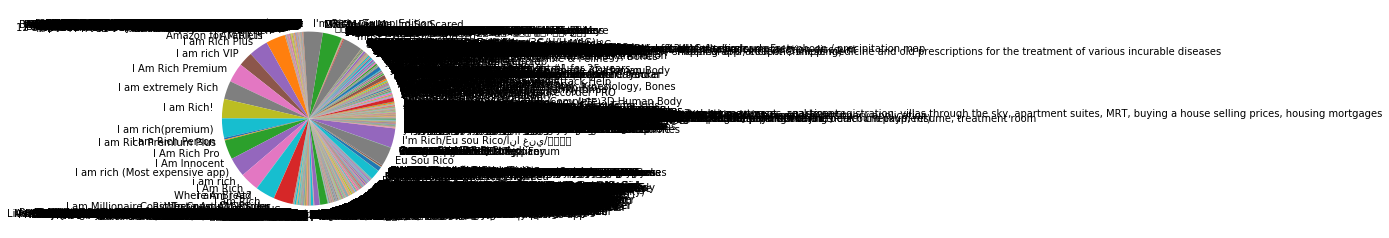

In [59]:
plt.pie(dfPrice.Price,labels=dfPrice.App)

### Content Rating

In [27]:
# nilai unik dari kolom Content Rating
dfGapps['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

### Genres

In [28]:
# nilai unik dari kolom Genres
dfGapps['Genres'].unique()

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Art & Design;Action & Adventure',
       'Auto & Vehicles', 'Beauty', 'Books & Reference', 'Business',
       'Comics', 'Comics;Creativity', 'Communication', 'Dating',
       'Education;Education', 'Education', 'Education;Creativity',
       'Education;Music & Video', 'Education;Action & Adventure',
       'Education;Pretend Play', 'Education;Brain Games', 'Entertainment',
       'Entertainment;Music & Video', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play',
       'Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
       'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
       'Music', 'Word', 'Racing', 'Casual;Creativity',
       'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board',
       'Trivia', 'Role 

### Android Ver

In [30]:
# nilai unik dari kolom Android Ver
dfGapps['Android Ver'].unique()

array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.3.3 and up',
       'Varies with device', '2.2 and up', '5.0 and up', '6.0 and up',
       '1.6 and up', '1.5 and up', '2.1 and up', '7.0 and up',
       '5.1 and up', '4.3 and up', '4.0.3 - 7.1.1', '2.0 and up',
       '3.2 and up', '4.4W and up', '7.1 and up', '7.0 - 7.1.1',
       '8.0 and up', '5.0 - 8.0', '3.1 and up', '2.0.1 and up',
       '4.1 - 7.1.1', nan, '5.0 - 6.0', '1.0 and up', '2.2 - 7.1.1',
       '5.0 - 7.1.1'], dtype=object)